In [5]:
import pandas as pd

projects_df = pd.read_csv("Проектные_данные_bnMAPpro.csv")
offers_df = pd.read_csv("Сделки_bnMAPpro.csv")

C:\Users\leofaraf\AppData\Local\Temp\ipykernel_26976\1127890122.py:4: DtypeWarning: Columns (16,18,21) have mixed types. Specify dtype option on import or set low_memory=False.
  offers_df = pd.read_csv("Сделки_bnMAPpro.csv")


In [4]:
df = offers_df
monthly_offers = (
    df.groupby(['year', 'month'])
      .size()
      .sort_index()
)
monthly_offers.plot(kind="bar")

KeyError: 'year'

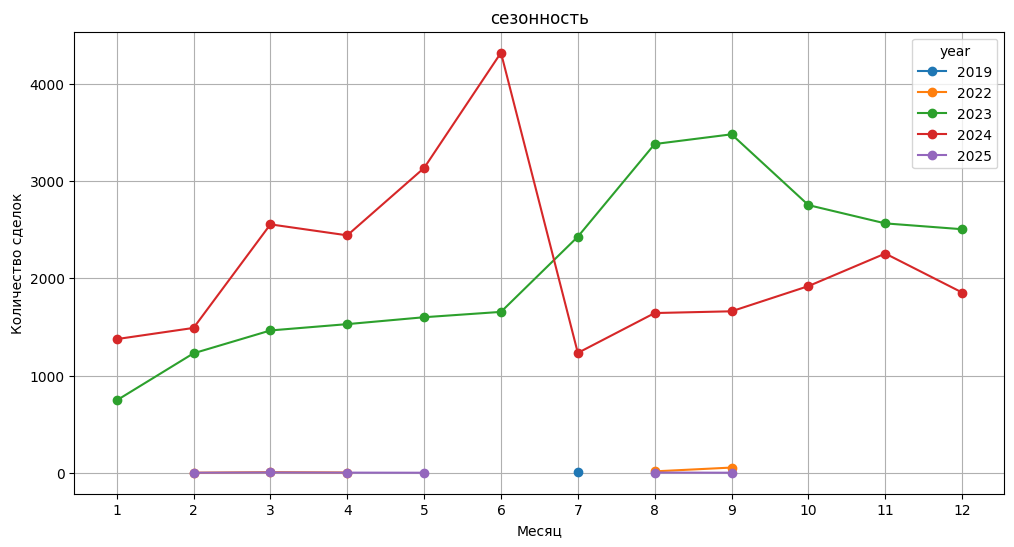

In [ ]:
import matplotlib.pyplot as plt

# Считаем количество сделок
monthly = df.groupby(['year', 'month']).size().reset_index(name='offers')

# Pivot — строки: месяцы, столбцы: годы
pivot = monthly.pivot(index='month', columns='year', values='offers')

# Построение
pivot.plot(figsize=(12, 6), marker='o')
plt.title("Cезонность")
plt.xlabel("Месяц")
plt.ylabel("Количество сделок")
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

Проблемные даты: 0


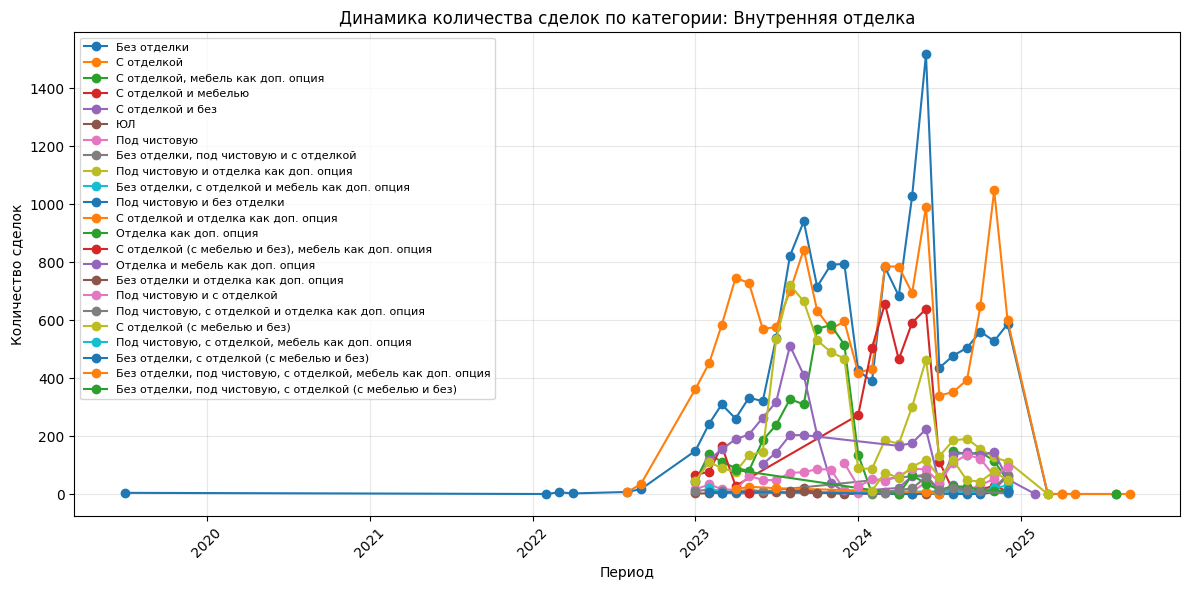

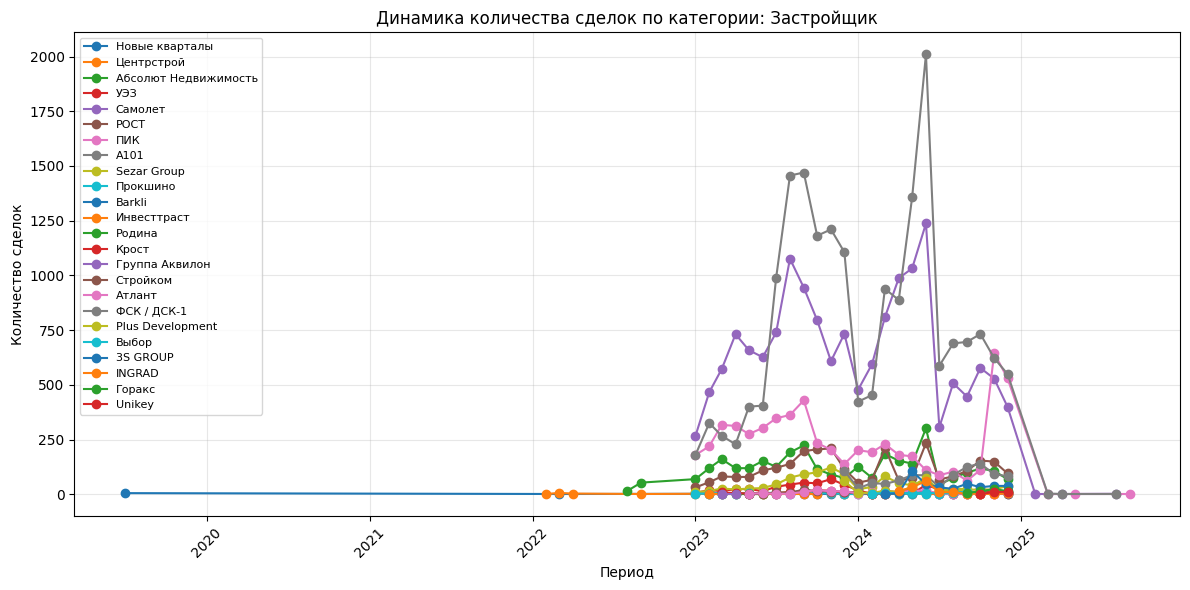

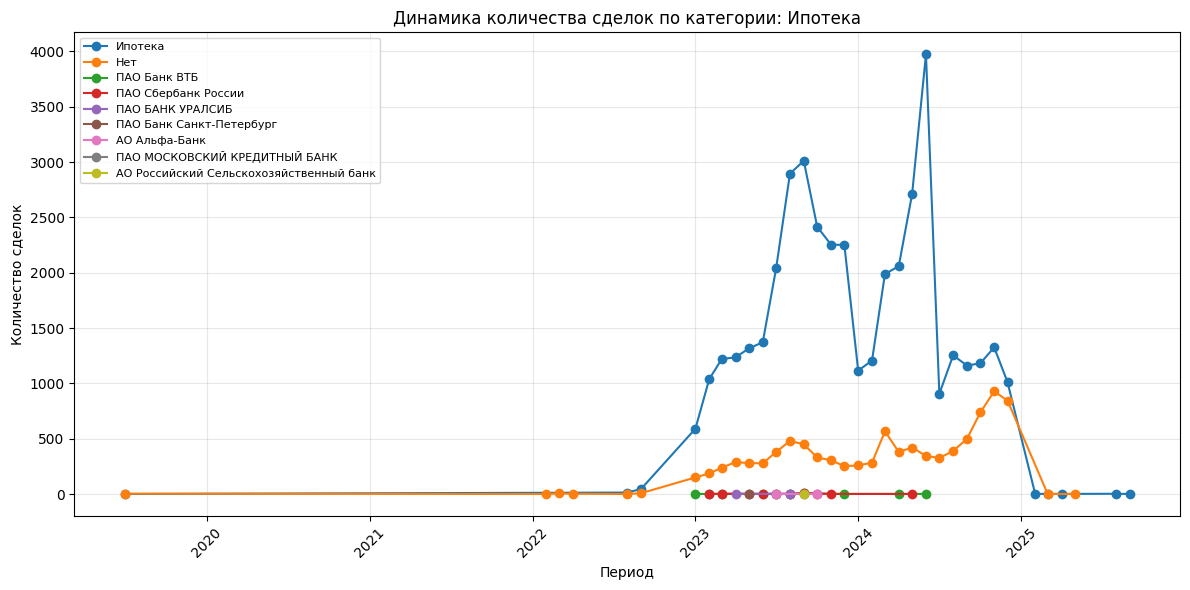

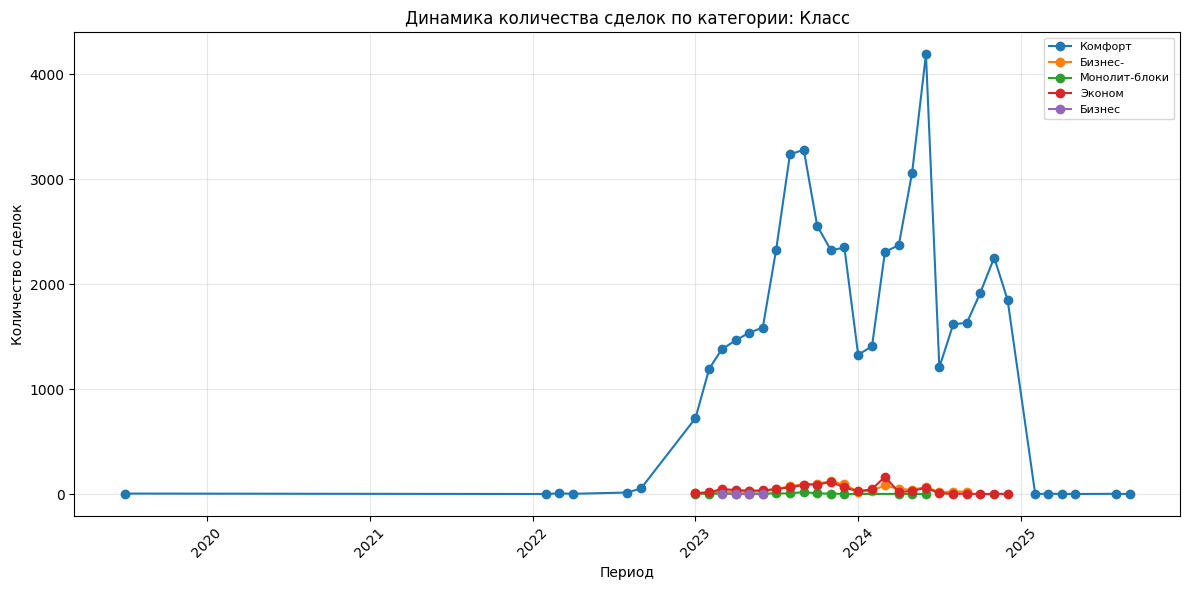

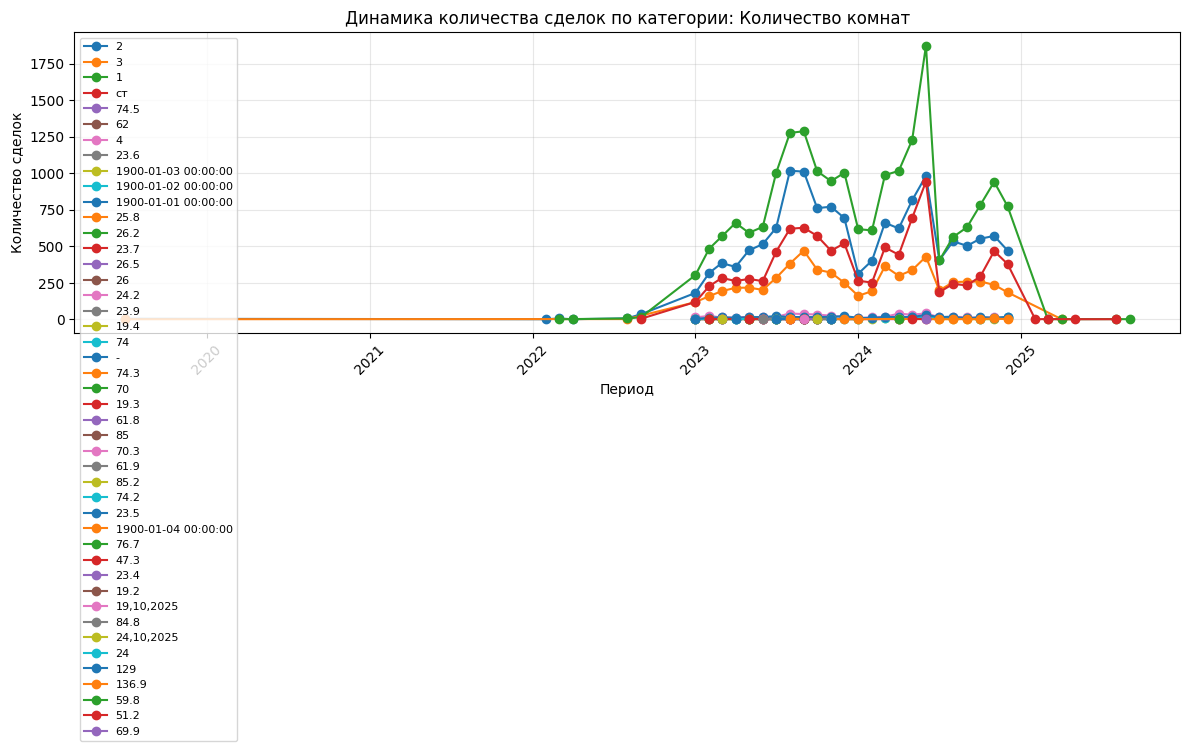

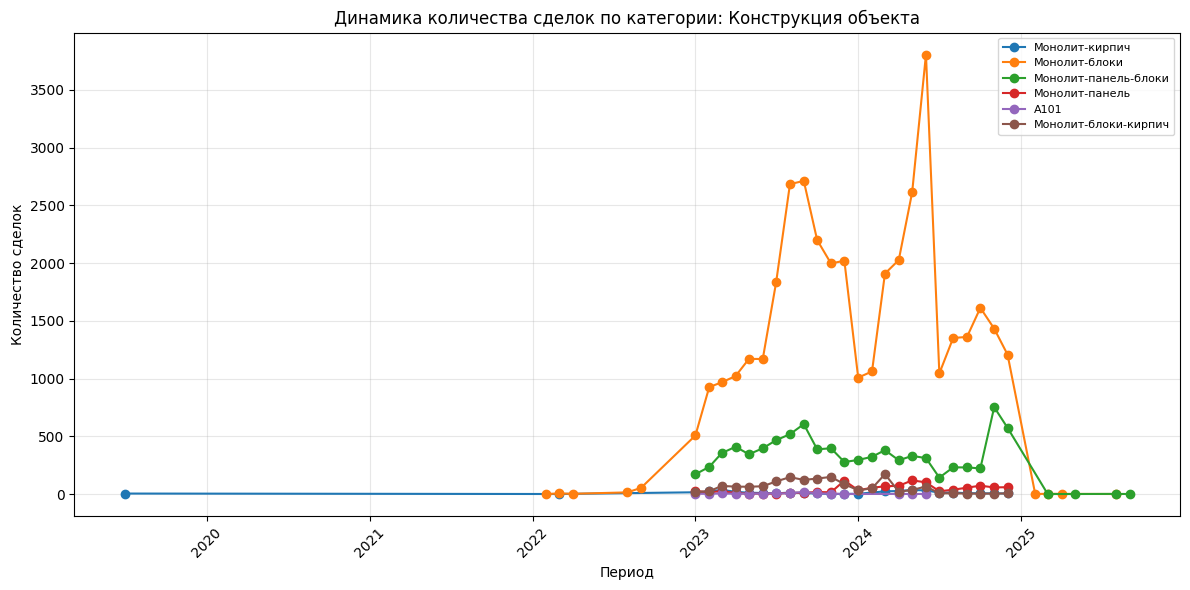

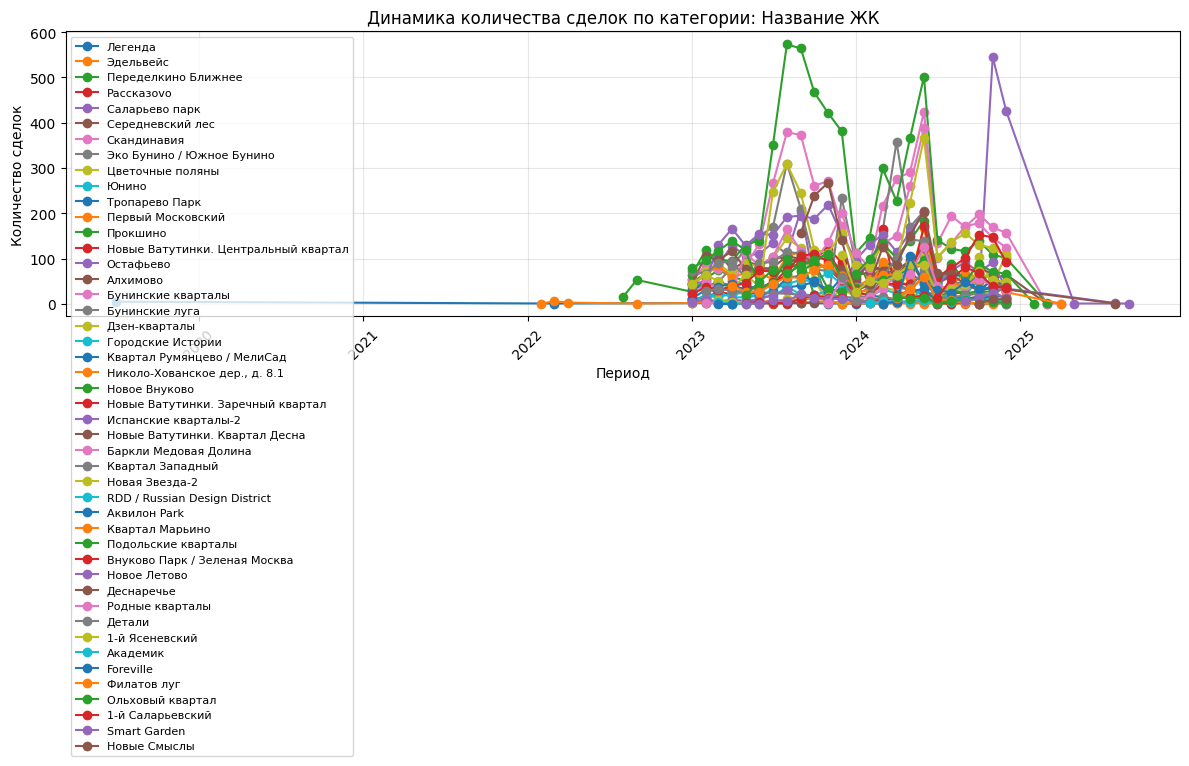

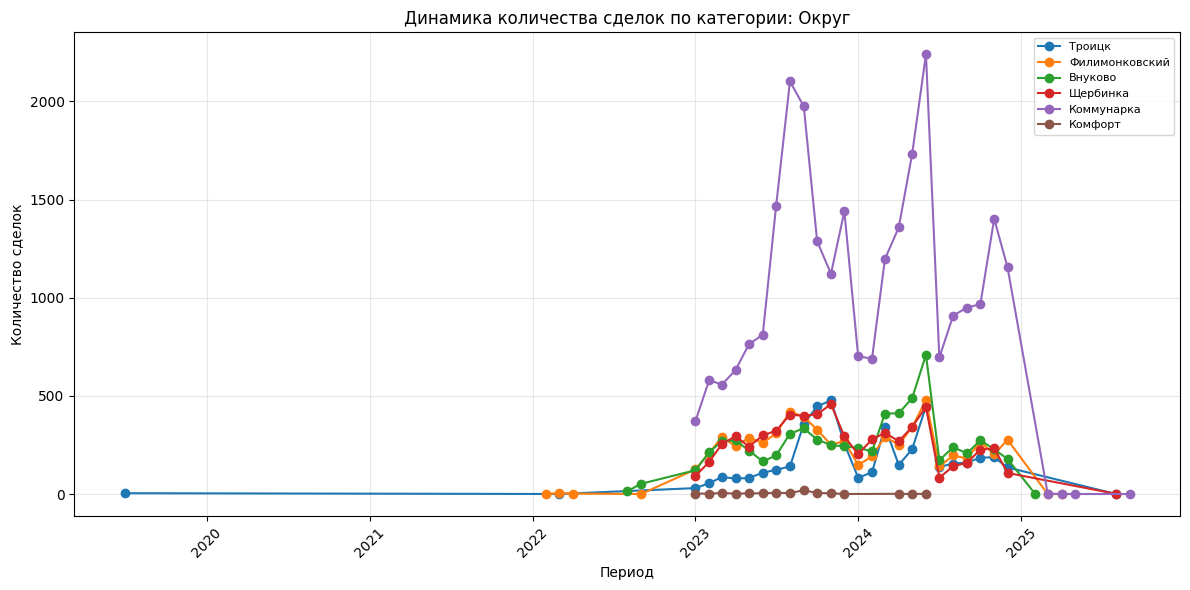

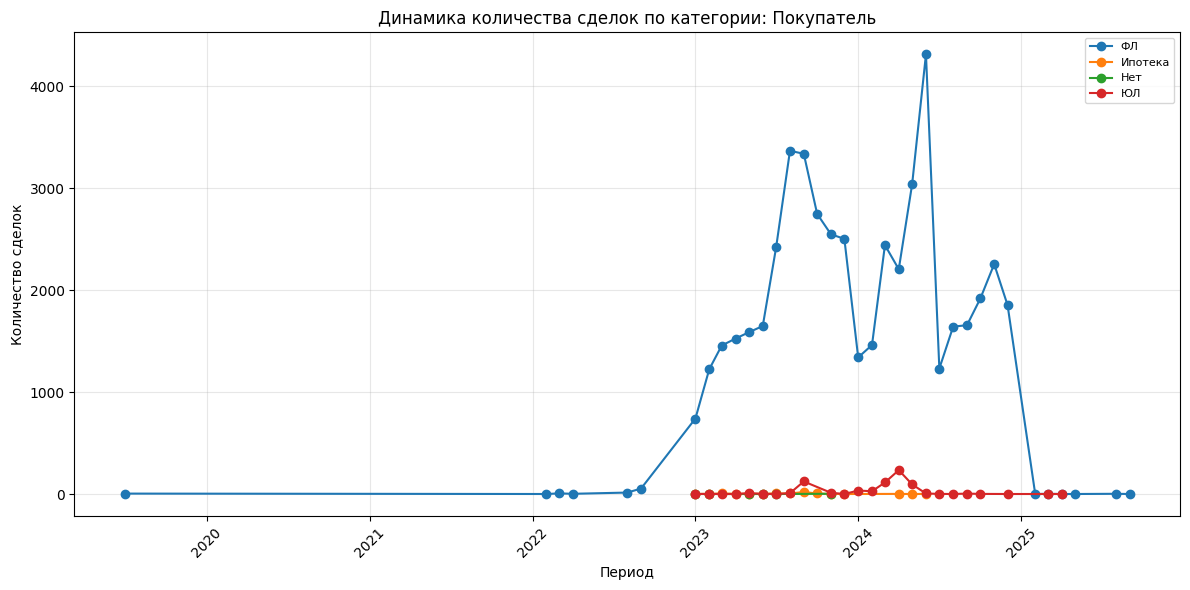

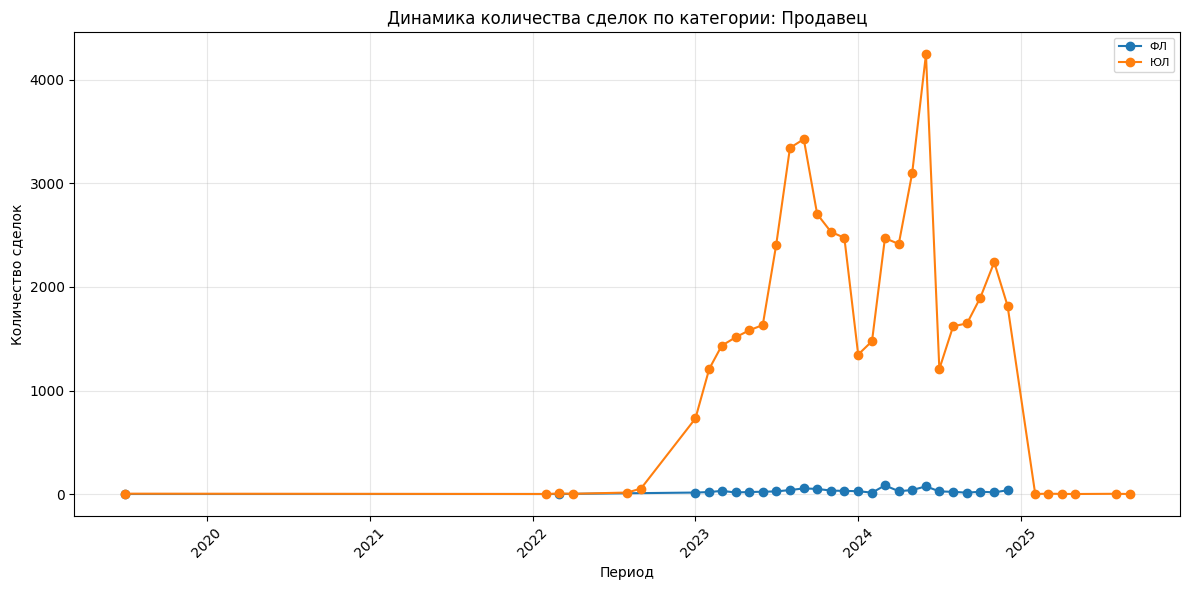

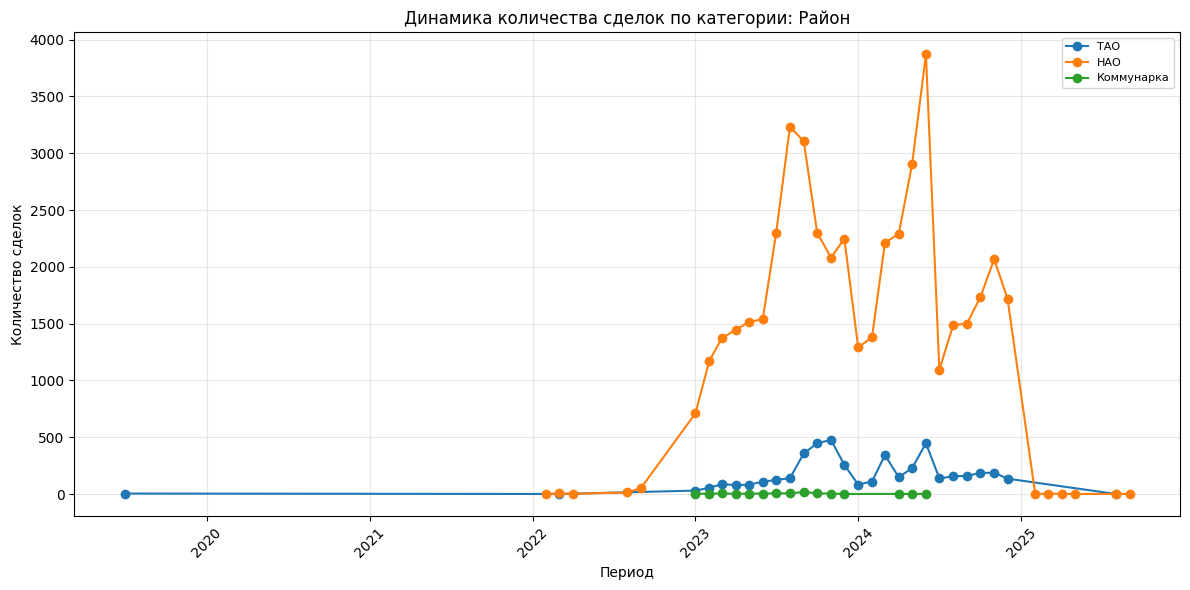

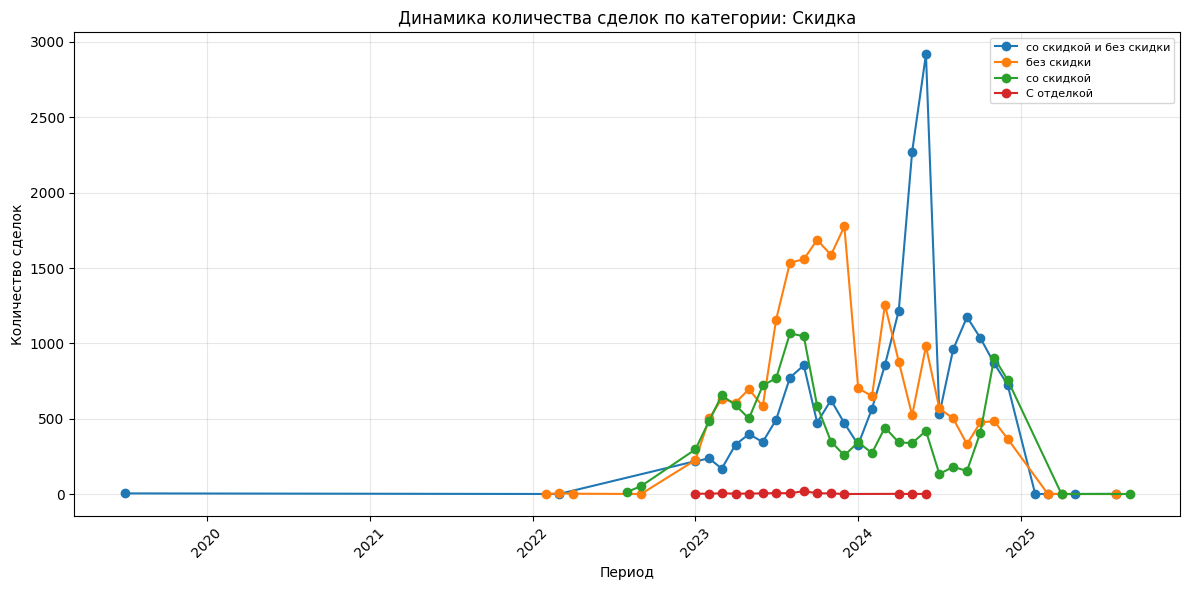

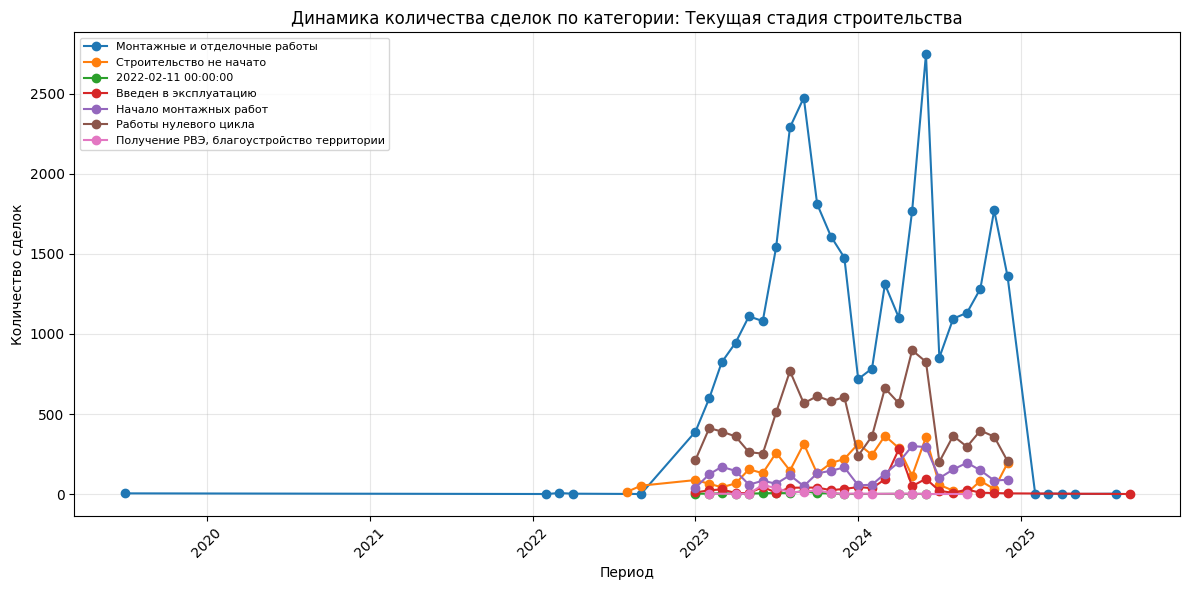

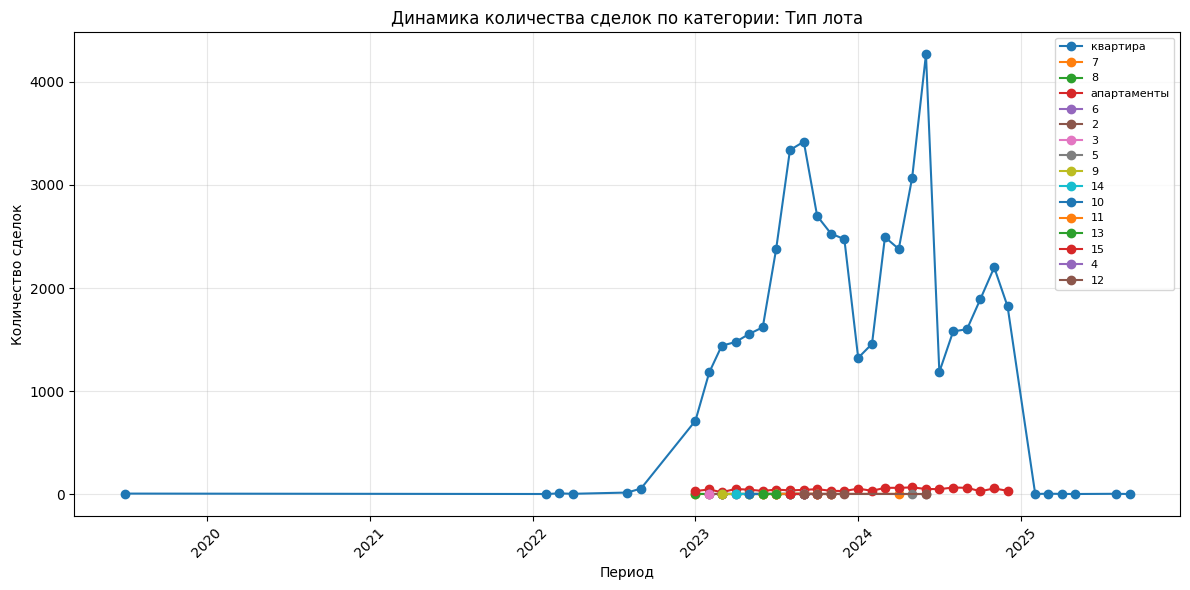

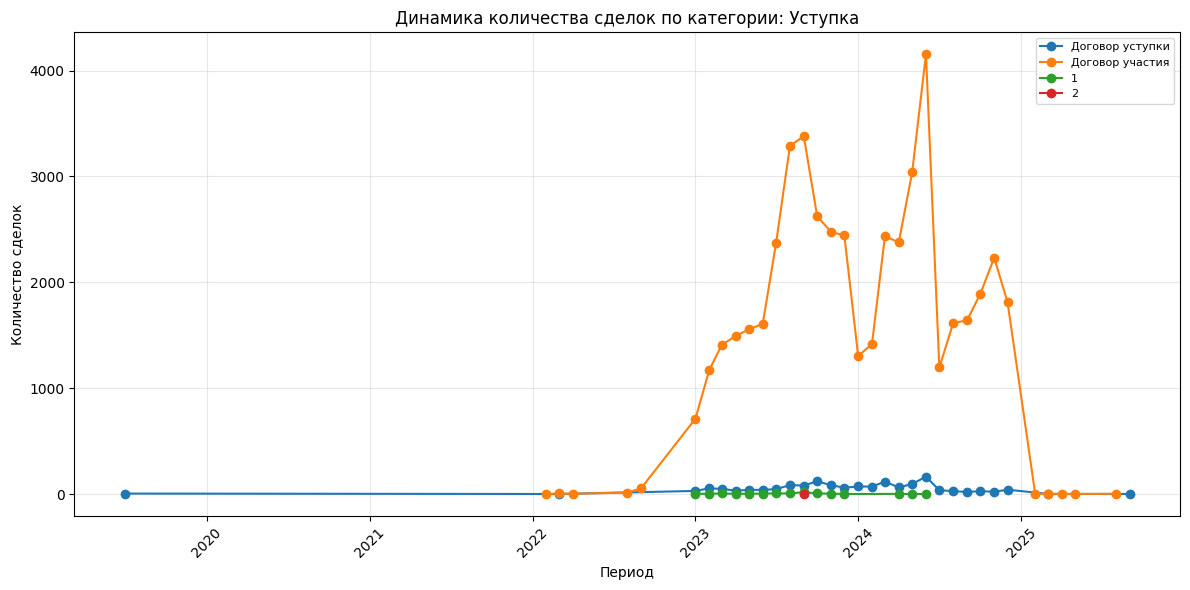

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Создадим временной индекс
df = offers_df

# --- 1. Приводим даты к единому формату ---
df['Дата договора (месяц.год)'] = pd.to_datetime(
    df['Дата договора (месяц.год)'],
    format='mixed',
    errors='coerce'
)

# Проверим, нет ли NaT
print("Проблемные даты:", df['Дата договора (месяц.год)'].isna().sum())

# Вытащим год и месяц
df['year'] = df['Дата договора (месяц.год)'].dt.year
df['month'] = df['Дата договора (месяц.год)'].dt.month

df['period'] = df['Дата договора (месяц.год)'].dt.to_period('M').dt.to_timestamp()

# --- 2. Список категориальных переменных ---
categorical_vars = [
    'Внутренняя отделка',
    'Застройщик',
    'Ипотека',
    'Класс',
    'Количество комнат',
    'Конструкция объекта',
    'Название ЖК',
    'Округ',
    'Покупатель',
    'Продавец',
    'Район',
    'Скидка',
    'Текущая стадия строительства',
    'Тип лота',
    'Уступка'
]

# --- 3. Генератор помесячных графиков ---
for var in categorical_vars:
    
    # группируем по месяцу и категории
    monthly = (
        df.groupby(['period', var])
        .size()
        .reset_index(name='count')
        .sort_values('period')
    )
    
    # рисуем график
    plt.figure(figsize=(12, 6))
    
    for category in monthly[var].unique():
        subset = monthly[monthly[var] == category]
        plt.plot(subset['period'], subset['count'], marker='o', label=str(category))
    
    plt.title(f'Динамика количества сделок по категории: {var}')
    plt.xlabel('Период')
    plt.ylabel('Количество сделок')
    plt.xticks(rotation=45)
    plt.legend(loc='best', fontsize=8)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

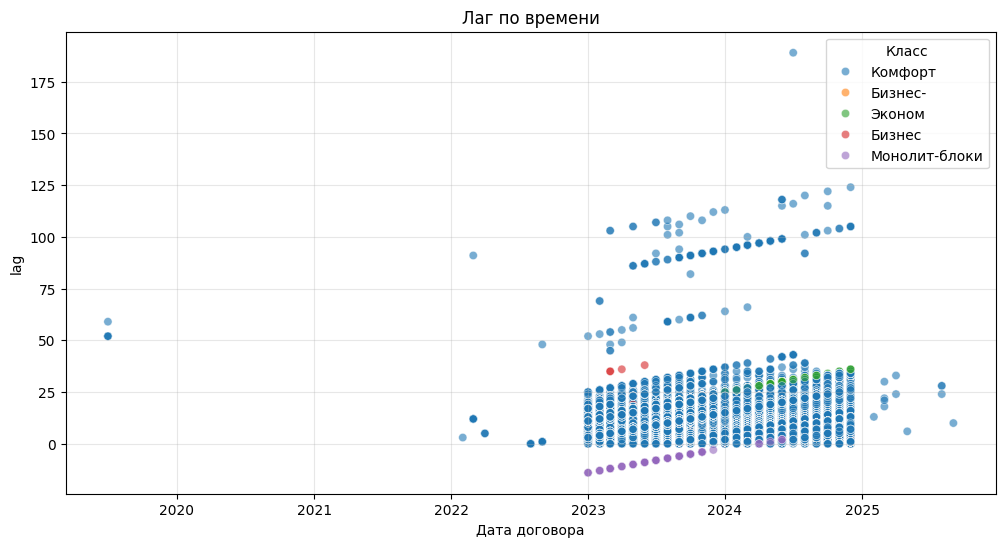

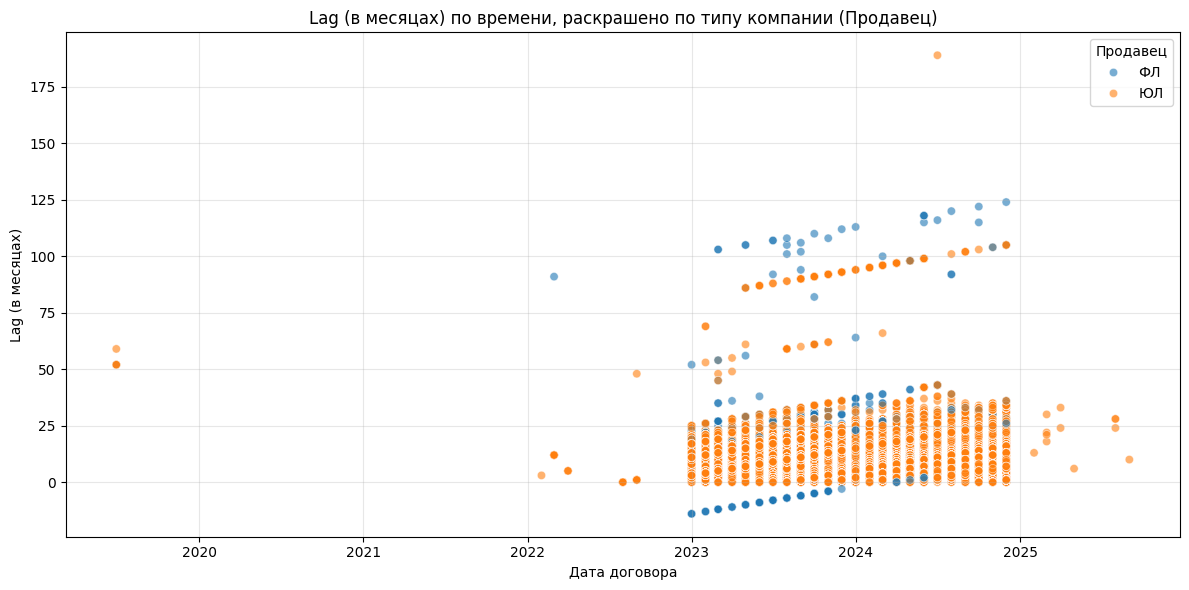

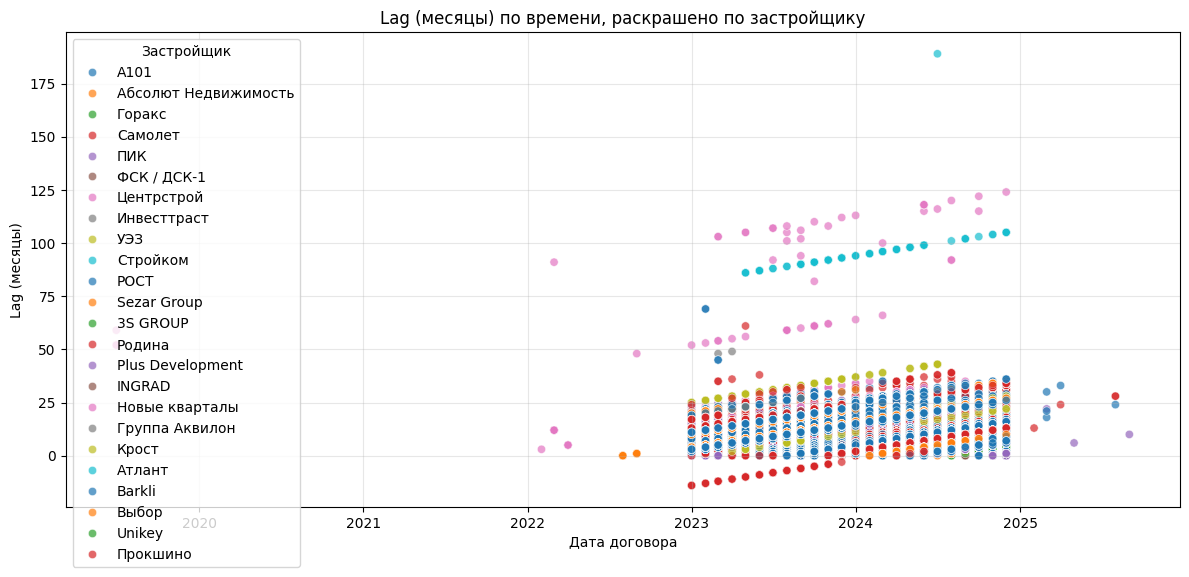

In [19]:
import seaborn as sns

df['Дата начала продаж'] = pd.to_datetime(
    df['Дата начала продаж'],
    format='mixed',
    errors='coerce'
)

df['lag_months'] = (
    (df['Дата договора (месяц.год)'].dt.year - df['Дата начала продаж'].dt.year) * 12 +
    (df['Дата договора (месяц.год)'].dt.month - df['Дата начала продаж'].dt.month)
)

plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df,
    x='Дата договора (месяц.год)',
    y='lag_months',          # или 'lag_days'
    hue='Класс',             # цвет по классу объекта
    palette='tab10',         # красивая палитра
    alpha=0.6
)
plt.title("Лаг по времени")
plt.xlabel("Дата договора")
plt.ylabel("lag")
plt.grid(alpha=0.3)
plt.show()

plt.figure(figsize=(12, 6))

sns.scatterplot(
    data=df,
    x='Дата договора (месяц.год)',
    y='lag_months',
    hue='Продавец',       # ← цвет по типу компании
    palette='tab10',
    alpha=0.6
)

plt.title("Lag (в месяцах) по времени, раскрашено по типу компании (Продавец)")
plt.xlabel("Дата договора")
plt.ylabel("Lag (в месяцах)")
plt.grid(alpha=0.3)
plt.legend(title='Продавец', loc='best')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))

sns.scatterplot(
    data=df,
    x='Дата договора (месяц.год)',
    y='lag_months',
    hue='Застройщик',        # ← ЦВЕТ ПО НАЗВАНИЮ КОМПАНИИ
    palette='tab10',
    alpha=0.7
)

plt.title("Lag (месяцы) по времени, раскрашено по застройщику")
plt.xlabel("Дата договора")
plt.ylabel("Lag (месяцы)")
plt.grid(alpha=0.3)
plt.legend(title='Застройщик', loc='best')
plt.tight_layout()
plt.show()


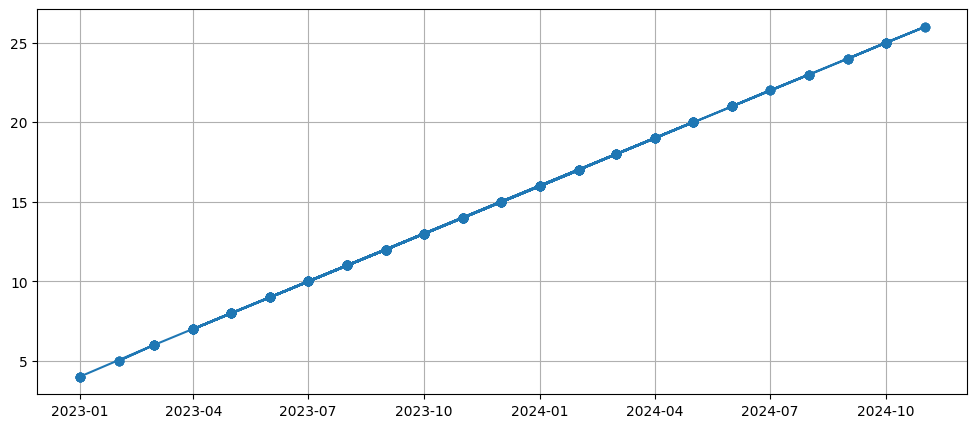

In [18]:
sample = df[df['ID корпуса'] == '93301f7eecabc7036d7ced8e45699ab1']   # подставь любой

plt.figure(figsize=(12,5))
plt.plot(sample['Дата договора (месяц.год)'], sample['lag_months'], 'o-')
plt.grid(True)
plt.show()

C:\Users\leofaraf\AppData\Local\Temp\ipykernel_26976\4291611459.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ur['Дата ввода в эксплуатацию'] = pd.to_datetime(
C:\Users\leofaraf\AppData\Local\Temp\ipykernel_26976\4291611459.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ur['start_period'] = df_ur['Дата ввода в эксплуатацию'].dt.to_period('M')


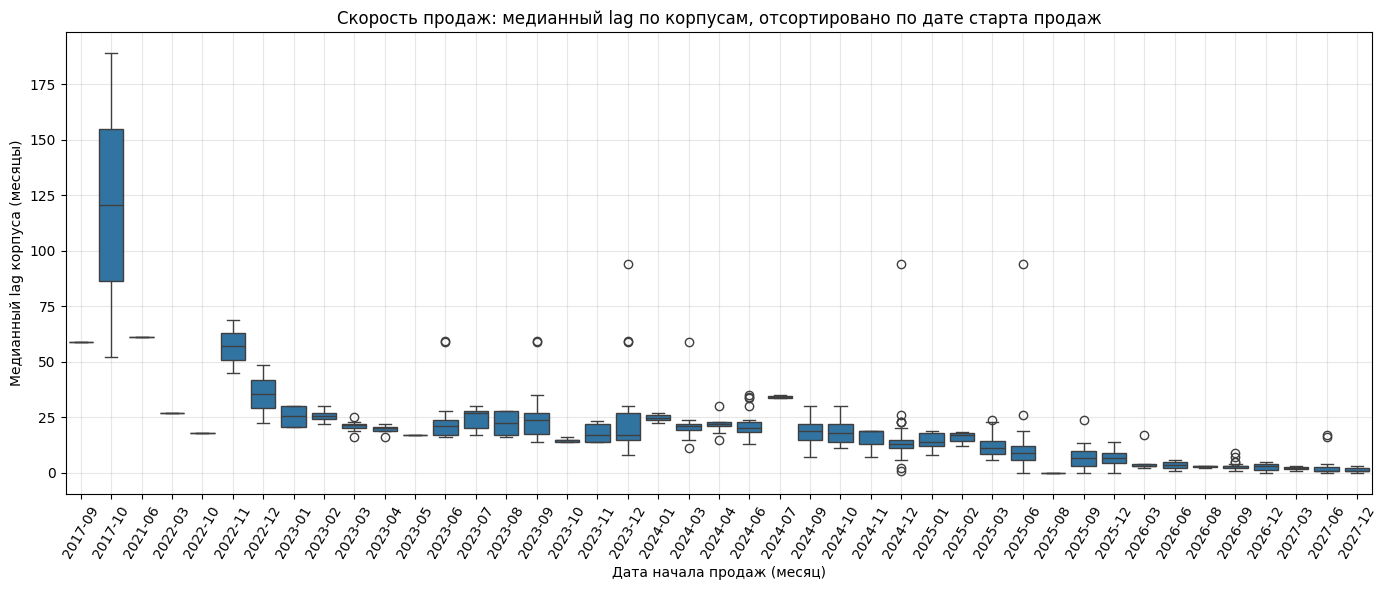

In [ ]:
df_ur = df[df['Продавец'] == 'ЮЛ']

df_ur['Дата ввода в эксплуатацию'] = pd.to_datetime(
    df['Дата ввода в эксплуатацию'], 
    format='mixed',
    errors='coerce'
)

df_ur['start_period'] = df_ur['Дата ввода в эксплуатацию'].dt.to_period('M')
median_lag_by_corpus = (
    df_ur.groupby(['ID корпуса'])['lag_months']
    .median()
    .reset_index()
)
corp_start = df_ur[['ID корпуса', 'start_period']].drop_duplicates()

median_lag_by_corpus = median_lag_by_corpus.merge(corp_start, on='ID корпуса')

# 1. Преобразуем start_period в категорию с правильным порядком
sorted_periods = sorted(median_lag_by_corpus['start_period'].unique())

median_lag_by_corpus['start_period'] = pd.Categorical(
    median_lag_by_corpus['start_period'],
    categories=sorted_periods,
    ordered=True
)

# 2. Строим отсортированный график
plt.figure(figsize=(14, 6))

sns.boxplot(
    data=median_lag_by_corpus.sort_values('start_period'),
    x='start_period',
    y='lag_months'
)

plt.title("Скорость продаж: медианный lag по корпусам, отсортировано по дате старта продаж")
plt.xlabel("Дата начала продаж (месяц)")
plt.ylabel("Дата ввода в эксплуатацию")
plt.xticks(rotation=60)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [31]:
import pandas as pd
import numpy as np

# Приведение дат к datetime (надёжно)
df['Дата начала продаж'] = pd.to_datetime(df['Дата начала продаж'], format='mixed', errors='coerce')
df['Дата ввода в эксплуатацию'] = pd.to_datetime(df['Дата ввода в эксплуатацию'], format='mixed', errors='coerce')
df['Дата договора (месяц.год)'] = pd.to_datetime(df['Дата договора (месяц.год)'], format='mixed', errors='coerce')

# --- Lag продаж (месяцы) ---
df['lag_sales'] = (
    (df['Дата договора (месяц.год)'].dt.year - df['Дата начала продаж'].dt.year) * 12 +
    (df['Дата договора (месяц.год)'].dt.month - df['Дата начала продаж'].dt.month)
)

# --- Lag строительства (месяцы) ---
df['lag_build'] = (
    (df['Дата ввода в эксплуатацию'].dt.year - df['Дата начала продаж'].dt.year) * 12 +
    (df['Дата ввода в эксплуатацию'].dt.month - df['Дата начала продаж'].dt.month)
)


In [33]:
df = df[(df['lag_sales'] >= 0) & (df['lag_build'] >= 0)]


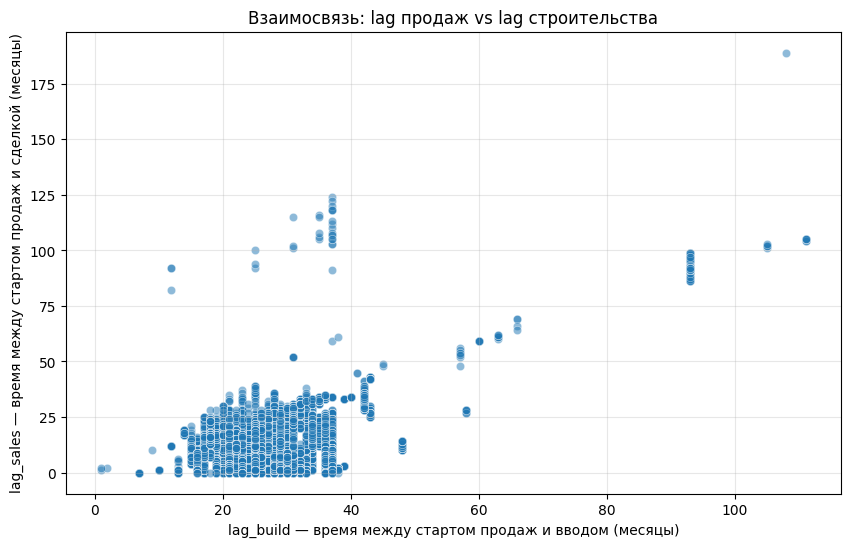

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=df,
    x='lag_build',
    y='lag_sales',
    alpha=0.5
)

plt.title("Взаимосвязь: lag продаж vs lag строительства")
plt.xlabel("lag_build — время между стартом продаж и вводом (месяцы)")
plt.ylabel("lag_sales — время между стартом продаж и сделкой (месяцы)")
plt.grid(alpha=0.3)
plt.show()


C:\Users\leofaraf\AppData\Local\Temp\ipykernel_26976\2215705600.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Дата начала продаж'] = pd.to_datetime(df['Дата начала продаж'], format='mixed', errors='coerce')
C:\Users\leofaraf\AppData\Local\Temp\ipykernel_26976\2215705600.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Дата ввода в эксплуатацию'] = pd.to_datetime(df['Дата ввода в эксплуатацию'], format='mixed', errors='coerce')
C:\Users\leofaraf\AppData\Local\Temp\ipykernel_26976\2215705600.

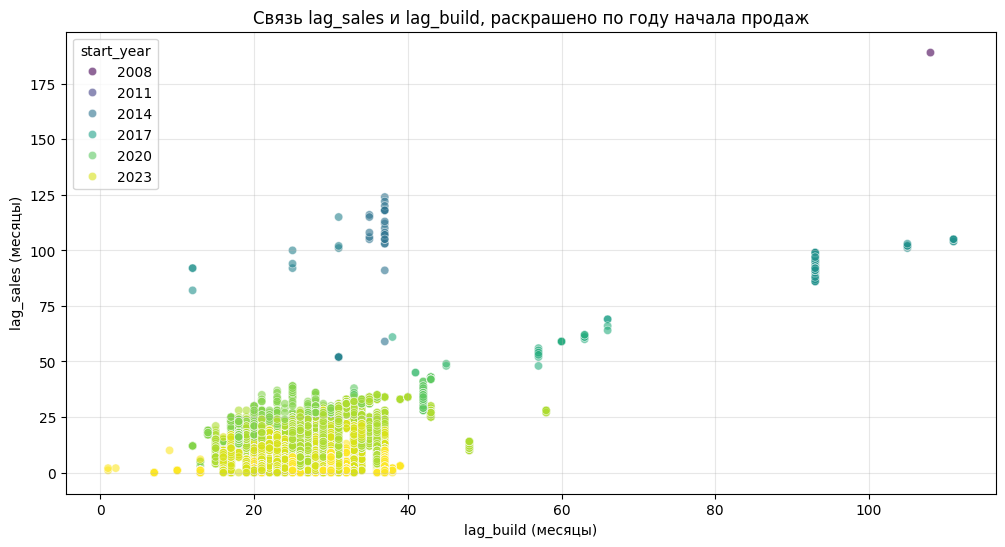


Корреляции lag_sales vs lag_build внутри каждого года старта:

                      lag_sales      corr
start_year                               
2008       lag_sales        NaN       NaN
           lag_build        NaN       NaN
2014       lag_sales   1.000000 -0.065759
           lag_build  -0.065759  1.000000
2015       lag_sales   1.000000 -0.377365
           lag_build  -0.377365  1.000000
2016       lag_sales   1.000000  0.371139
           lag_build   0.371139  1.000000
2017       lag_sales        NaN       NaN
           lag_build        NaN       NaN
2018       lag_sales   1.000000  0.371919
           lag_build   0.371919  1.000000
2019       lag_sales   1.000000  0.980196
           lag_build   0.980196  1.000000
2020       lag_sales   1.000000  0.700896
           lag_build   0.700896  1.000000
2021       lag_sales   1.000000  0.488355
           lag_build   0.488355  1.000000
2022       lag_sales   1.000000  0.186890
           lag_build   0.186890  1.000000
2023       l

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Приводим даты ---
df['Дата начала продаж'] = pd.to_datetime(df['Дата начала продаж'], format='mixed', errors='coerce')
df['Дата ввода в эксплуатацию'] = pd.to_datetime(df['Дата ввода в эксплуатацию'], format='mixed', errors='coerce')
df['Дата договора (месяц.год)'] = pd.to_datetime(df['Дата договора (месяц.год)'], format='mixed', errors='coerce')

# --- 2. LAG SALES ---
df['lag_sales'] = (
    (df['Дата договора (месяц.год)'].dt.year - df['Дата начала продаж'].dt.year) * 12 +
    (df['Дата договора (месяц.год)'].dt.month - df['Дата начала продаж'].dt.month)
)

# --- 3. LAG BUILD ---
df['lag_build'] = (
    (df['Дата ввода в эксплуатацию'].dt.year - df['Дата начала продаж'].dt.year) * 12 +
    (df['Дата ввода в эксплуатацию'].dt.month - df['Дата начала продаж'].dt.month)
)

# --- убираем невозможные значения ---
df = df[(df['lag_sales'] >= 0) & (df['lag_build'] >= 0)]

# --- 4. Год старта продаж ---
df['start_year'] = df['Дата начала продаж'].dt.year

# --- 5. scatterplot lag_sales vs lag_build по годам ---
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df,
    x='lag_build',
    y='lag_sales',
    hue='start_year',
    palette='viridis',
    alpha=0.6
)
plt.title("Связь lag_sales и lag_build, раскрашено по году начала продаж")
plt.xlabel("lag_build (месяцы)")
plt.ylabel("lag_sales (месяцы)")
plt.grid(alpha=0.3)
plt.show()


# --- 6. Корреляции внутри годов ---
corrs = (
    df.groupby('start_year')[['lag_sales','lag_build']]
    .corr()
    .rename(columns={'lag_build':'corr'})
)
print("\nКорреляции lag_sales vs lag_build внутри каждого года старта:\n")
print(corrs)

# --- 7. Простая регрессия внутри годов ---
import statsmodels.api as sm

print("\nРегрессии lag_sales ~ lag_build по годам старта:\n")

for year, sub in df.groupby('start_year'):
    if len(sub) > 10:  # чтобы была выборка
        X = sm.add_constant(sub['lag_build'])
        y = sub['lag_sales']
        model = sm.OLS(y, X).fit()
        print(f"--- {year} ---")
        print(model.summary())
        print()


C:\Users\leofaraf\AppData\Local\Temp\ipykernel_26976\526206059.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['start_period'] = df['Дата начала продаж'].dt.to_period('M')


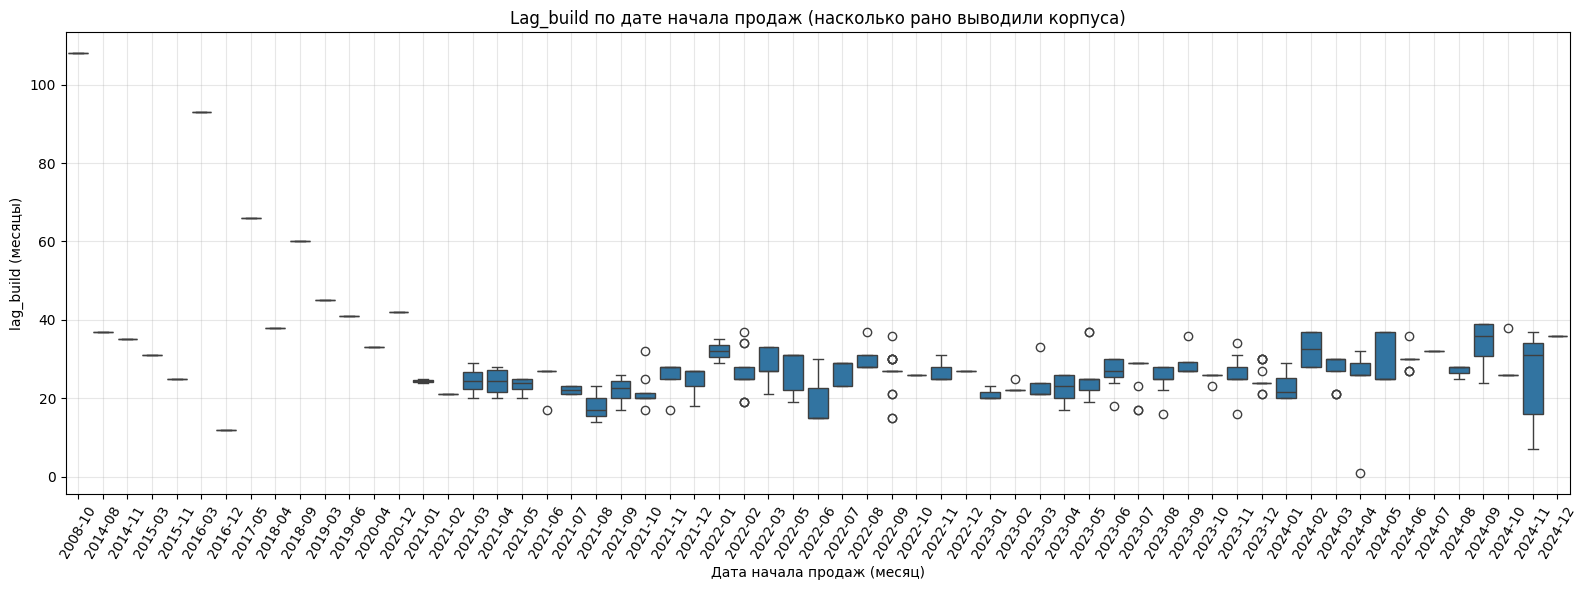

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Округляем дату начала продаж до месяца
df['start_period'] = df['Дата начала продаж'].dt.to_period('M')

# Считаем median lag_build по корпусам
lag_build_by_corpus = (
    df.groupby(['ID корпуса'])[['lag_build']]
    .median()
    .reset_index()
)

# Добавляем период старта продаж
corp_start = df[['ID корпуса', 'start_period']].drop_duplicates()
lag_build_by_corpus = lag_build_by_corpus.merge(corp_start, on='ID корпуса')

# Приводим start_period к отсортированной категории
sorted_periods = sorted(lag_build_by_corpus['start_period'].unique())
lag_build_by_corpus['start_period'] = pd.Categorical(
    lag_build_by_corpus['start_period'],
    categories=sorted_periods,
    ordered=True
)

# Строим график
plt.figure(figsize=(16, 6))
sns.boxplot(
    data=lag_build_by_corpus.sort_values('start_period'),
    x='start_period',
    y='lag_build'
)

plt.title("Lag_build по дате начала продаж (насколько рано выводили корпуса)")
plt.xlabel("Дата начала продаж (месяц)")
plt.ylabel("lag_build (месяцы)")
plt.xticks(rotation=60)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


C:\Users\leofaraf\AppData\Local\Temp\ipykernel_26976\3880493131.py:9: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = df.pivot_table(


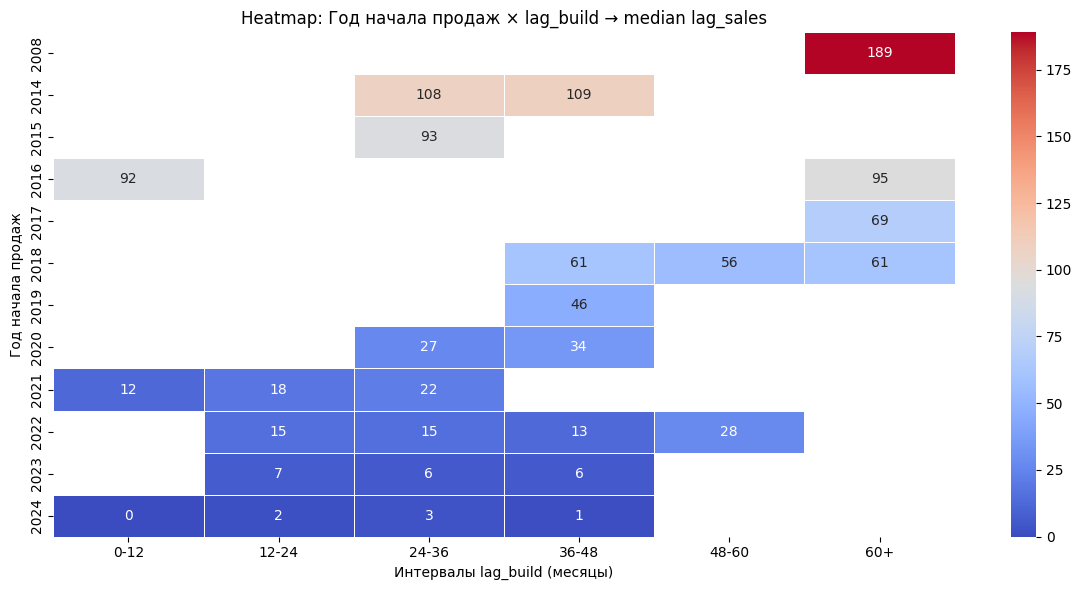

In [37]:
# --- Биннинг lag_build ---
# интервалы: 0–12, 12–24, ..., 60+
bins = [0, 12, 24, 36, 48, 60, 120]
labels = ["0-12", "12-24", "24-36", "36-48", "48-60", "60+"]

df['lag_build_bin'] = pd.cut(df['lag_build'], bins=bins, labels=labels, include_lowest=True)

# --- Считаем медианный lag_sales ---
pivot = df.pivot_table(
    index='start_year',
    columns='lag_build_bin',
    values='lag_sales',
    aggfunc='median'
)

# --- Heatmap ---
plt.figure(figsize=(12, 6))
sns.heatmap(
    pivot,
    annot=True,
    fmt=".0f",
    cmap="coolwarm",
    linewidths=.5
)

plt.title("Heatmap: Год начала продаж × lag_build → median lag_sales")
plt.xlabel("Интервалы lag_build (месяцы)")
plt.ylabel("Год начала продаж")
plt.tight_layout()
plt.show()

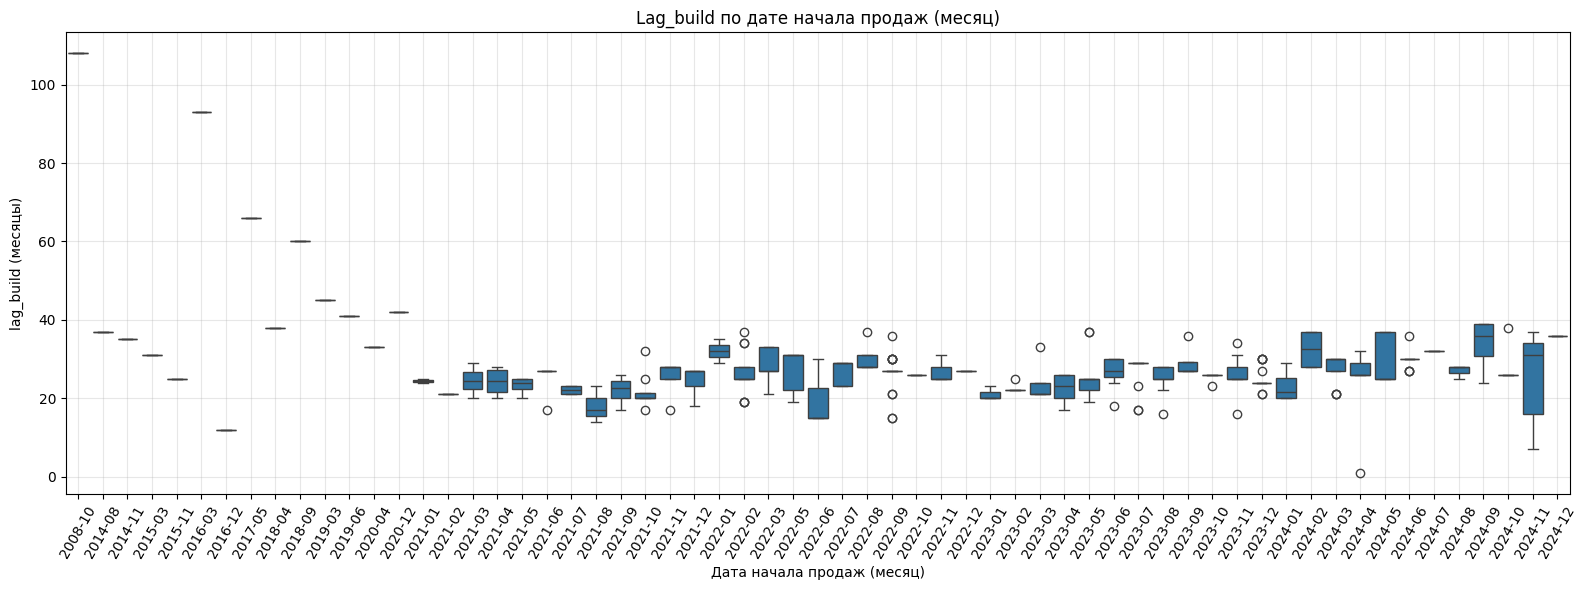

In [38]:
# считаем медианный lag_build по корпусам
lag_build_by_corpus = (
    df.groupby(['ID корпуса'])[['lag_build']]
      .median()
      .reset_index()
)

# добавляем месяц старта
corp_start = df[['ID корпуса','start_period']].drop_duplicates()
lag_build_by_corpus = lag_build_by_corpus.merge(corp_start, on='ID корпуса')

# сортируем периоды
sorted_periods = sorted(lag_build_by_corpus['start_period'].unique())
lag_build_by_corpus['start_period'] = pd.Categorical(
    lag_build_by_corpus['start_period'],
    categories=sorted_periods,
    ordered=True
)

# график
plt.figure(figsize=(16,6))
sns.boxplot(
    data=lag_build_by_corpus.sort_values('start_period'),
    x='start_period',
    y='lag_build'
)
plt.title("Lag_build по дате начала продаж (месяц)")
plt.xlabel("Дата начала продаж (месяц)")
plt.ylabel("lag_build (месяцы)")
plt.xticks(rotation=60)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()